#Social Data Mining, Week 4
#Introduction to Social Network Analysis

This week's lecture will introduce you to social network analysis (SNA). SNA has become a staple of social data scientists because it provides insights into human relationships. We can quickly visualize the relationships between people, and calculate metrics that quantify the structural properties of people and networks.

This lecture will show you how to collect data for networks, represent it in Python, and visualize and explore it using both Python and the Gephi application. Upon completing this week's lecture and assignments you'll be able to:

* Understand the connection between graph theory and social networks relationships.
* Implement data structure representations for graphs in native Python.
* Create and visualize graphs in Python using the networkx graph library.
* Download graph data from an online resource and display it in networkx.
* Develop algorithms that infer graphs for entities that have no direct relationships.
* Explore graphs using the powerful Gephi application.

#0. Preparing for this lecture

**Background:** In this lecture we won't use the LinkedIn API because scraping has become forbidden, but we will still install the LinkedIn Python client wrapper module below to complement the videos. We also will be using the Gephi graph visualization application.

**Estimated time:** 20 minutes (If you get stuck, post to the forum!).

**Additional resources:** [Gephi Website](https://gephi.org).

You also need to install two software components:

1. [Download](https://gephi.org/users/download/) and [install](https://gephi.org/users/install/) the Gephi network visualization program.
2. Install the five Python modules listed below.

In [1]:
def install_module(package_name):
    try:
        __import__(package_name)
        print('module ' + package_name + ' already installed')
    except ImportError:
        print('installing module ' + package_name)
        import pip
        pip.main(['install', package_name])

install_module('python-linkedin')
install_module('requests')
install_module('requests_oauthlib')
install_module('twitter')
install_module('oauth2')

installing module python-linkedin
You are using pip version 6.0.8, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py install for oauthlib

  Running setup.py install for python-linkedin
module requests already installed
module requests_oauthlib already installed
module twitter already installed
module oauth2 already installed


If you have any trouble installing these modules, please post to the course forum.

#1. Graph theory and social network representations

**Overview:** Social network analysis draws concepts and algorithms from the field of graph theory. After completing this section you'll understand basic graphic theory concepts and definitions such as nodes, edges, indegree, and undirected graphs.

**Time estimate:** 40 minutes.

**Additional resources:**

* [Bruce Hoppe's excellent introduction to Graph Theory](http://webwhompers.com/graph-theory.html)

To provide you with basic background on graph theory, **read the first three sections** of [Bruce Hoppe's excellent introduction to Graph Theory](http://webwhompers.com/graph-theory.html) (up to "Density and Average Degree"). After completing the reading, you should know mathematical definitions for a graph (both directed and undirected), nodes, edges, and degree (both indegree and outdegree)

Consider the example graph below (from [Pegasus Data](http://pegasusdata.com/2013/01/10/facebook-friends-network-mapping-a-gephi-tutorial/)).


<img src="graphexample.png" alt="Smiley face" height="300" width="500">

A social network graph can be represented as a square matrix, called an **adjacency matrix**. A value of 1 at row i and column j indicates an edge between the i'th and j'th people in the graph. For example, the adjacency matrix for the network above follows.

    0  1  1  1  0  1
    1  0  0  1  0  1
    1  0  0  0  0  1
    1  1  0  0  0  1
    0  0  0  0  0  1
    1  1  1  1  1  0
    
To interpret the matrix, consider the fourth row: `1 1 0 0 0 1`. This row represents the relationships for Celine (who has id 4 listed under "Nodes"). We see there are three ones in the row, indicating that Celine has three friends, or degree 3. The one in the second column indicates that Celine is connected to Carla (id 2). You'll also notice that Celine is also connected to John (id 1) and Diana (id 6).

You'll note a few things about the above matrix. First, it's a symmetric matrix. The cell at row 2, column 4 contains the same value as row 4 column 2. This relationship holds for **undirected graphs**, where an edge represents a two-way relationship as in Facebook or LinkedIn. In **directed graphs**, such as followers on Twitter, relationships are not necessarily reciprocal, so the matrix need not be symmetric. You will also notice that the diagonal from top left to bottom right contains zeros because people do not connect to themselves.

#2. Representing graphs in native Python

**Overview:** After completing this section, you'll understand how to represent graphs using sparse matrices in native Python. Understanding this data structures will deepen your understanding of the networkx library in section 3.

**Time estimate:** 20 minutes (excluding assignment questions).

**Additional resources:** [Python Patterns: Implementing Graphs](https://www.python.org/doc/essays/graphs/).

As with the text **feature vectors** from Lecture 2, adjacency matrices are extremely **sparse**. For example, Facebook's adjacency matrix is one billion by one billion (one *Qunitillian* cells), but most rows only contains a few hundred non-zero entries. 

To effectively represent sparse matrices, we use an **adjecency list** representation. Notice how closely this resembles the sparse vector representations we discussed in week 2. 

In [2]:
graph = {
         'John' : ['Carla', 'Simon', 'Celine', 'Diana'],
         'Carla' : ['John', 'Celine', 'Diana'],
         'Simon' : ['John', 'Diana'],
         'Celine' : ['John', 'Carla', 'Diana'],
         'Winston' : ['Diana'],
         'Diana' : ['John', 'Carla', 'Simon', 'Celine', 'Winston', 'Diana'],
    }

In practice, because graphs only contain a single edge between any two people, the edges are stored in a set instead of a list. This representation allows for fast O(1) membership queries because both a dictionary and set lookups are O(1).


In [3]:
graph = {
         'John'    : set(['Carla', 'Simon', 'Celine', 'Diana']),
         'Carla'   : set(['John', 'Celine', 'Diana']),
         'Simon'   : set(['John', 'Diana']),
         'Celine'  : set(['John', 'Carla', 'Diana']),
         'Winston' : set(['Diana']),
         'Diana'   : set(['John', 'Carla', 'Simon', 'Celine', 'Winston', 'Diana']),
    }

print('Diana' in graph['Simon'])
print('Celine' in graph['Simon'])

True
False


Assignment 1 (immediate feedback) asks you to create a native Python datastructure for a different graph, and calculate the degree of every node.

#3. Representing graphs with networkx.


**Overview:** In this section you'll learn how to visualize graphs with the networkx python library, a powerful graph analysis and visualization toolkit.

**Time-estimate:** 20 minutes, excluding the assignment.

**Related resources:** 

* [networkx website](http://networkx.github.io)
* [networkX tutorial](http://networkx.github.io/documentation/networkx-1.8/tutorial/tutorial.html)

Recall that in Lesson 2 we used nltk and scikit_learn because they provided robust, flexible, and efficient software for NLP tasks. Python's networkx library fills a similar gap for graph algorithms. Spend 30 minutes working through the [networkX tutorial](http://networkx.github.io/documentation/networkx-1.8/tutorial/tutorial.html).

We'll walk through representing the graph above using networkx:

Populating the interactive namespace from numpy and matplotlib


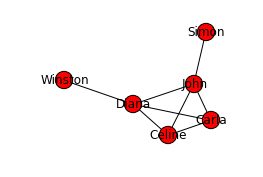

In [4]:
import networkx as nx

g = nx.Graph()
g.add_edge('John','Carla')
g.add_edge('John','Simon')
g.add_edge('John','Celine')
g.add_edge('John','Diana')
g.add_edge('Carla','Celine')
g.add_edge('Carla','Diana')
g.add_edge('Celine','Diana')
g.add_edge('Winston','Diana')

%pylab inline
plt.rc('figure', figsize=(3,2))
nx.draw(g,with_labels=True)

Let's make the graph prettier. We'll change the color of the nodes and edges. More options are described in the [draw_networkx documentation](http://networkx.github.io/documentation/networkx-1.8/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx).

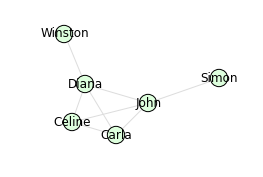

In [5]:
nx.draw(g,node_color='#ddffdd',edge_color='#dddddd',with_labels=True)# hexcode RGB

Let's size also size the nodes according to their degree, as described [in a Stackoverflow post](http://stackoverflow.com/questions/16566871/node-size-dependent-on-the-node-degree-on-networkx).

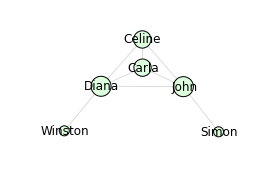

In [6]:
d = nx.degree(g)
node_size = [v*100 for v in d.values()]
nx.draw(g,node_color='#ddffdd',edge_color='#dddddd',with_labels=True,nodelist=d.keys(),node_size=node_size)

***Assignment 2*** asks you to construct and visualize an example graph in networkx.

#4. Create a Custom Graph

**Overview:** In this section of the lesson you'll learn how to download a real social network dataset (a provided graph).

**Time estimate:** 90 minutes.

**Additional resources:**

* [Ozgur's Python LinkedIn wrapper module](https://github.com/ozgur/python-linkedin)
* [LinkedIn API documentation](https://developer.linkedin.com/apis)
* [Shilad's LinkedIn profile](https://www.linkedin.com/in/shilad)

This exercise previously used the LinkedIn website to create data for our first graph, but since LinkedIn specifically forbids this and has additional layers of security in place, we are going to use an alternative source. You may still read in the LinkedIn API and functionalities in the given links, as this may still be important for other applications.
Instead, we will use a provided list of connections to build and visualize a graph. This will be a good exercise for converting a simple list structure into a usable graph:

In [7]:
# Run this to download the list which will form the basis for the graph
def get_provided_network():
    fname = 'mynetwork.txt'
    import os, urllib
    f = open(fname, 'w')
    f.write(urllib.urlopen('http://www.cs.umd.edu/~golbeck/INST633o/enron-all.csv').read())
    f.close()    
    print('retrieved %s with %d bytes' % (fname,os.path.getsize(fname)))

get_provided_network()

retrieved mynetwork.txt with 55103 bytes


***Assignment 3*** asks you to translate these simple data structures into the native Python adjacency list representation and compute some values on it.

#5. Load the list graph into networkx

**Overview:** In this section, you'll gain practice representing the LinkedIn network as a networkx graph.

**Time estimate:** 20 minutes.

Let's visualize the downloaded graph using networkx. First, we write a function to construct it. 

In [8]:
import networkx as nx

def make_networkx_graph(fname,delim):    
    g = nx.Graph()
    
    # Build graph
    with open(fname,'r') as f:
        for line in f:
            names = line[:-1].split(delim) # Split two names with given delimiter; omit newline symbol
            g.add_edge(names[0], names[1])
    return g

We can then visualize the network, but we omit the names for visibility:

Populating the interactive namespace from numpy and matplotlib


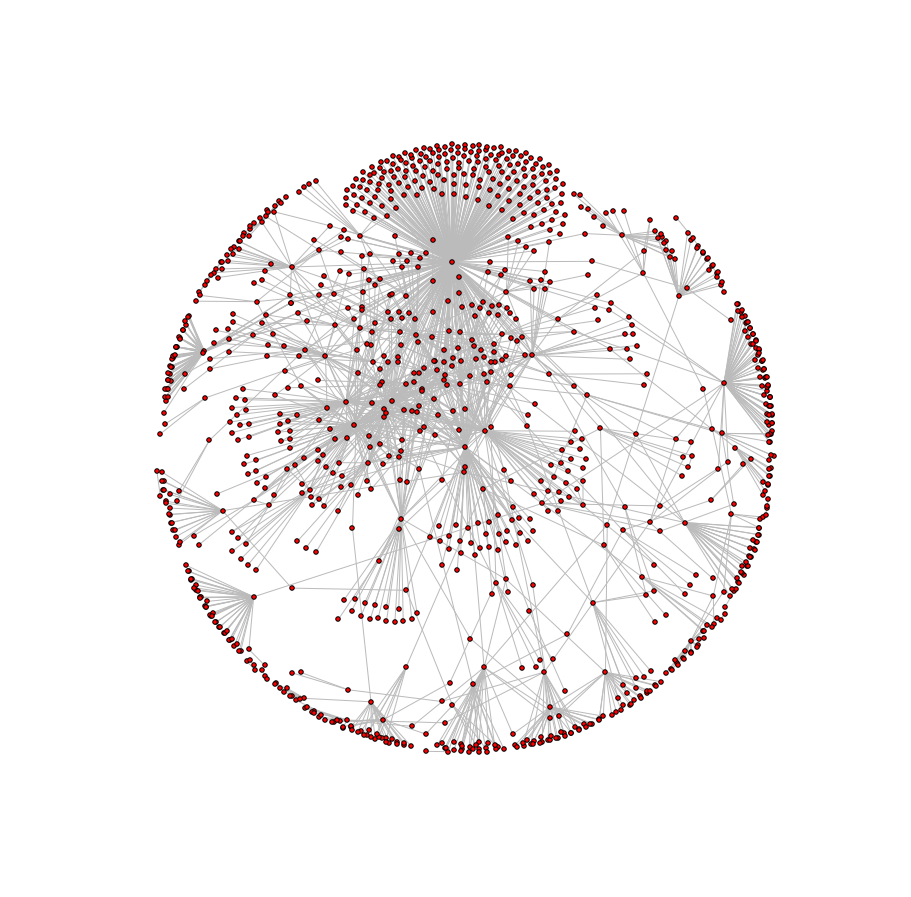

In [9]:
%pylab inline
g = make_networkx_graph('mynetwork.txt',',')
plt.rc('figure', figsize=(12, 12))
nx.draw(g, node_size=20, edge_color='#bbbbbb')

#6. View your network using Gephi.

**Overview:** Networkx provides a powerful, flexible, and efficient set of operations on graphs. However, it can be cumbersome when "exploring" graphs before you understand them completely. We'll use the gephi tool for this.

**Time estimate:** 40 minutes.

**Additional resources:**

* [Getting started with Gephi: Visualizing my Facebook Graph](http://blog.ouseful.info/tag/gephi+facebook/?orderBy=date&order=ASC)
* [Gephi modularity tutorial](https://www.youtube.com/watch?v=7LMnpM0p4cM)

In order to access your graph from Gephi, you need to export it to a gml file (graph markup language):

In [10]:
nx.write_gml(make_networkx_graph('mynetwork.txt',','), 'mynetwork.gml')

Afterwards, watch the YouTube video on the course website entitled [Visualizing your LinkedIn graph using Gephi](https://www.youtube.com/watch?v=qfDUY2swCH0).

#7. Inferring a graph: Words in Twitter

**Overview:** In this section, you'll learn how to *infer* a graph between entities that don't have direct relationships. As a case study, we'll explore words in a Twitter stream.

**Time estimate:** 45 minutes.

In many social networks, an edge represents a direct relationship between two entities. For example, two LinkedIn members are connected in the previous graph if they have accepted a connection invitation.

While these direct relationships sometimes exist, other times they do not. For example, consider the relationship between words in Tweets. Are "dog" and "cat" related? What *signals* indicate an edge should exist? In cases like this, you need to carefully decide what, precisely, an edge represents.

In our representation, an edge between "dog" and "cat" would indicate that many tweets contain both "dog" and "cat." The first step in constructing this graph is creating a corpus of tweets (each tweet is document).

###7.1. Download the tweets corpus (or build your own).

The `read_tweets()` method below will download the tweet corpus from my server the first time and cache it in a file on your computer. I used 2000 tweets containing the word **apple**.

In [11]:
def read_tweets():
    """
        Returns a list of all the tweets in the corpus.
        If the corpus does not yet exist, downloads it from Shilad's server.
    """
    
    import codecs
    import os

    if not os.path.exists('query_tweets.txt'):
        import os, urllib
        print('Preparing tweets. This will only happen once!')    
        f = open('query_tweets.txt', 'w')
        f.write(urllib.urlopen('http://shilad.com/socialdatamining/query_tweets.txt').read())
        f.close()    
        print('retrieved query_tweets.txt with %d bytes' % os.path.getsize('query_tweets.txt'))

    return codecs.open('query_tweets.txt', 'r', encoding='utf-8').readlines()

tweets = read_tweets()
print(len(tweets))

Preparing tweets. This will only happen once!
retrieved query_tweets.txt with 230792 bytes
2515


Alternately, if you would like to generate a different set of tweets, you can run the code below. Beware that collecting 2000 tweeks may take some time, depending on the popularity of your search. You need to substitute the credientials you created during Week 3 below.

In [ ]:
def save_tweets(query, n):
    """
        Run this if you'd like to save a different set of tweets from the corpus I created.
        Beware that it takes a long time.
    """
    
    import codecs
    
    install_module('twitter')
    install_module('oauth2')

    from twitter import OAuth, TwitterStream
    
    # Replace the contents of this dictionary with your access information.
    #
    twitter_config = {
            # These two values appear as "API key" and "API secret" under the "Application Settings" section
            'API_KEY' :  'XXXXX',           
            'API_SECRET' :  'XXXXX',
            
            # These two values appear as "Access token" and "Access token secret" under the "Your access token" section
            'ACCESS_TOKEN' :  'XXXXX',
            'ACCESS_SECRET' :  'XXXXX',
          }
    
    oauth = OAuth(
                twitter_config['ACCESS_TOKEN'],
                twitter_config['ACCESS_SECRET'],
                twitter_config['API_KEY'],
                twitter_config['API_SECRET'],
            )
    
    ts = TwitterStream(auth = oauth)
    
    f = codecs.open('query_tweets.txt', 'w', encoding='utf-8')
    for (i, item) in enumerate(ts.statuses.filter(track=query)):
        if i > n:
            break
        print('reading tweet %d' % i)
        f.write(item['text'])
        f.write('\n')
        f.flush()
    f.close()

# Uncomment this line to rebuild the query_tweets.txt file for a custom search.
# save_tweets('apple', 2000)

###7.2. Generate the graph of Tweets for Gephi

The last step we'll need to analyze relationships between the tweets. First, we'll use two utility methods. 


The first method loads a set of stop words from the [SocialSensor project](http://www.socialsensor.eu/).

In [12]:
import urllib

def read_stopwords():
    """
    Loads a list of stop words from the SocialSensor project (http://www.socialsensor.eu/).
    """    
    git_url = 'https://raw.githubusercontent.com/socialsensor/socialsensor-stream-manager/master/src/main/resources/stopwords'
    stopwords = set()
    stopwords.update(urllib.urlopen(git_url + '/twitter-stopwords.txt').readlines())
    stopwords.update(urllib.urlopen(git_url + '/common-english-words.txt').readlines())
    stopwords = set([line.strip().lower() for line in stopwords])
    stopwords.update(['http', 'https', 'apple'])
    return stopwords

print('read %d stopwords' % len(read_stopwords()))

read 548 stopwords


Next, we'll write a simple function to split a tweet into words:

In [13]:
import re

def split_tweet(tweet):
    """Splits a tweet into a list of words."""
    return re.split('[^a-zA-Z]+', tweet.lower())

Next we want to build a nested dictionary of co-occurrences between words. The outer dictionary will have key word 1 (e.g. 'dog') and the inner dictionary will have key word 2 (e.g. 'cat'). The value is the number of tweets that have both words. As an optimization, we'll only consider the 100 most frequent words.

In [14]:
from collections import defaultdict

def build_cocounts():
    """
        Constructs a nested dictionary of number of coocurrences between words.
        The value is the number of tweets that include both words:
        
        {
            dog : {
                cat : 34,      # 34 tweets contain dog AND cat.
                mouse : 17,
                ...
            },
            cat : {
                ....
            },
            ...
        }
    """
    stopwords = read_stopwords()
    
    # build up overall counts
    counts = defaultdict(int)
    for tweet in read_tweets():
        for word in set(split_tweet(tweet)):
            if len(word) >= 3 and word not in stopwords:
                counts[word] +=1

    # we'll only consider relationships between the 100 most frequent words
    top = sorted(counts, key=counts.get, reverse=True)[:100]
        
    # build up nested dictionary  { word1 -> word2 -> cocount .... }
    cocounts = defaultdict(lambda: defaultdict(int))    
    for tweet in read_tweets():
        words = set(split_tweet(tweet))
        words = words.intersection(top)
        for w1 in words:
            for w2 in words:
                cocounts[w1][w2] += 1

    return cocounts

print(len(build_cocounts()))

100


And lastly, we need to build up the networkx to export to gephi. To simplify the graph and reduce noise, each word will only contain edges to its 10 most common neighbors. Note that this graph is *directed*. We'll take a quick peek at the graph, and write it to a gml in preparation for Gephi.

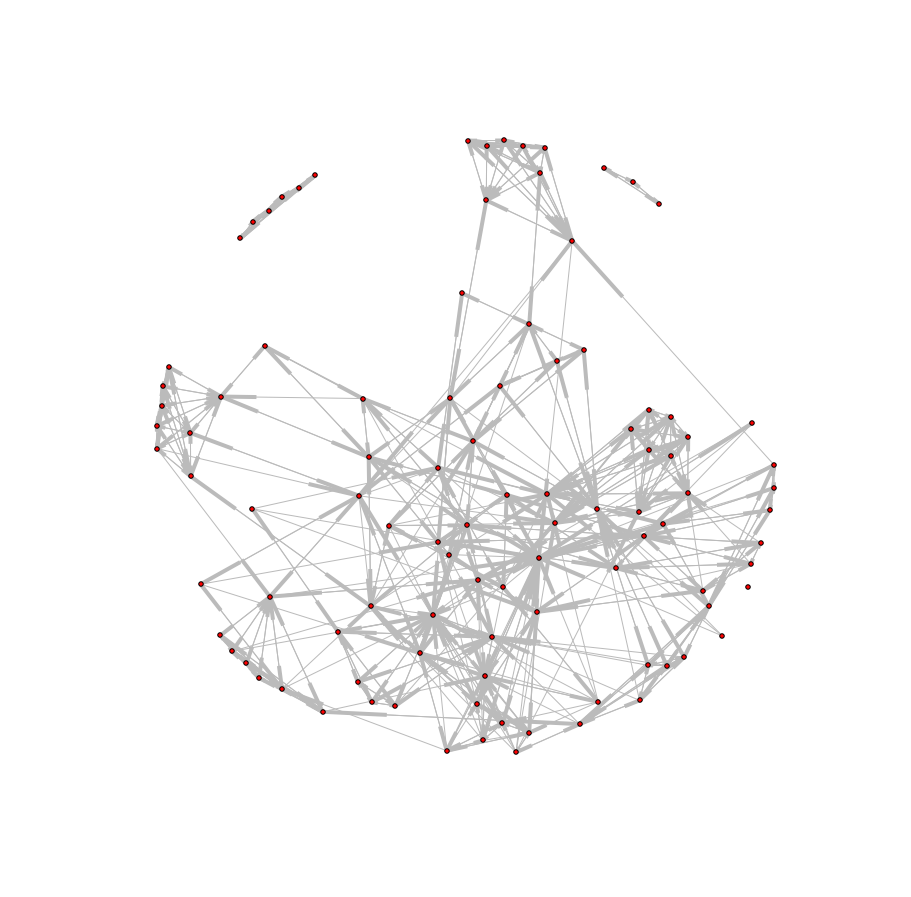

In [15]:
import networkx as nx

cocounts = build_cocounts()
g = nx.DiGraph()
for w1 in cocounts:
    neighbors = sorted(cocounts[w1], key=cocounts[w1].get, reverse=True)[:10]
    for w2 in neighbors:
        g.add_edge(w1, w2)
nx.write_gml(g, 'twitter_query.gml')
nx.draw(g, node_size=20, edge_color='#bbbbbb')

***Assignments 4*** will ask you to create, represent, and draw your own inferred graph using networkx.

#8. View the Twitter word association graph using Gephi

**Overview:** Watch the [Visualize the Twitter Word Association Graph Using Gephi](https://www.youtube.com/watch?v=EPzGZ2Lf75c) video.

**Time estimate:** 45 minutes

***Assignments 5*** will ask you to explore your own inferred in Gephi.